# ResNet

- 개요
    - 이전의 연구들고 모델의 layer가 너무 깊어질수록 오히려 성능이 떨어지는 형상이 발생, 이는 Gradient Vanishing(기울기 소실), Gradient Exploding (기울기 폴발) 문제 때문에 학습이 잘 이루어지지 않기 때문
    - Gradient Vanishing (기울기 소실) 이란 layer가 깊어질수록 미분이 점점 많이 하기 때문에 Backpropagation (역전파) 을 해도 앞의 layer일수록 미분값이 작아져 그만큼 output에 영향을 끼치는 weight 정도가 작아지는 것을 의미, 이는 Overfitting과는 다른 문제 인데 Overfitting은 핛브 데이터에 완벽하게 fitting 시킨 탓에 테스트 성능에서는 안 좋은 결과를 보이는 것은 뜻하고 Gradient Vanishing(기울기 소실) 은 Degradation (성능 저하) 문제로 학습 데이터에도 학습이 되지 않는 것을 뜻함
    - 따라서 이를 극복하기 위해 ResNet이 고안, ResNet은 Skip Connection을 이용한 Residual Learning (잔차 학습) 을 통해 layer가 깊어짐에 따른 Gradient Vanishing 문제를 해결

- ResNet
    - 기존의 Neural Net (신경망) 의 학습 목적은 input(x)을 타겟값(y)으로 mapping하는 함수 H(x)를 찾는 것 
    - 따라서 H(x) - y 를 최소화 하는 방향으로 학습을 진행한다.
    - 이 때 이미지 Classification과 같은 문제의 경우 x에 대한 타겟값 y는 사실 x를 대변하는 것으로 y와 x의 의미가 같게끔 mapping해야 한다. 즉 강아지 사진의 pixel값이 input(x)로 주어질 때, 이를 2개의 label중 강아지가 1에 해당한다면 타겟값(y)를 1로 정해서 학습하는 것이 아닌 강아지 사진의 pixel (x)로 y를 mapping해야 한다.
    - 따라서 네트워크의 출력값이 x가 되도록 H(x) - x를 최소화 하는 방향으로 학습을 진행
    - F(x) = H(x) - x를 잔차하고 하며 이 잔차를 학습하는 것이 Residual Learning (잔차 학습) 이라 한다.

    - 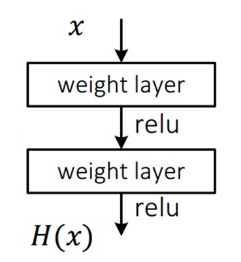

    - 이 때 위 그림처럼 네트워크의 output이 x가 되도록 mapping 하는 것이 아닌 아래 그림처럼 단순히 H(x)가 x가 되도록 Residual Learning (잔차 학습) 으로 학습해도 결국 Gradient Vanishing (기울기 소실) 문제가 해결된 것은 아니다. 띠라서 네트워크는 0이 되도록 학습시키고 마지막에 x를 더해서 H(x)가 x가 되도록 학습하면 미분으 해도 x자체는 미분값 1을 갖기 때문에 각 layer 마다 최소 Gradient로 1은 갖도록 한 것이다.

    - 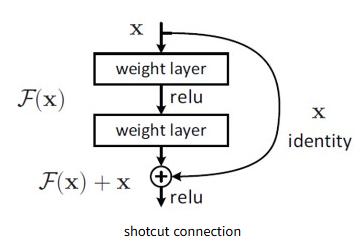

    - 따라서 layer가 아무리 깊어져도 최소 Gradient로 1이상의 값을 가지므로 Gradient Vanishing (기울기 소실) 문제를 해결한 것이다.
    - 정리하자면 아래와 같다
        1. 이미지에서는 H(x) = x가 되도록 학습
        2. 네트워크의 output F(x)는 0이 되도록 학습
        3. F(x) + x = H(x) = x가 되도록 학습 시키면 미분해도 F(x) + x의 미분값은 F'(x) + 1로 최소 1이상이다.
        4. 모든 layer에서의 Gradient가 1 + F'(x)이므로 Gradient Vanishing (기울기 소실) 현상은 해결된다.